In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:28<00:00, 39.5MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.3MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip", "r")
zip_ref.extractall("/content")
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/dogs-vs-cats.zip' mode='r'>>

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [10]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
#normalization
def process(image, label):
  image = tf.cast(image / 255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [20]:
#create CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size= (3,3), padding= "valid", activation= "relu", input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2), strides = 2, padding = "valid"))

model.add(Conv2D(64, kernel_size= (3,3), padding= "valid", activation= "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2), strides = 2, padding = "valid"))

model.add(Conv2D(128, kernel_size= (3,3), padding= "valid", activation= "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2), strides = 2, padding = "valid"))

model.add(Flatten())

model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [22]:
model.compile(optimizer= "adam", loss = "binary_crossentropy", metrics= ["accuracy"])

In [23]:
history = model.fit(train_ds, epochs = 10, validation_data= validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 108ms/step - loss: 1.5676 - accuracy: 0.5891 - val_loss: 0.6178 - val_accuracy: 0.6624
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5670 - accuracy: 0.7037 - val_loss: 0.5389 - val_accuracy: 0.7242
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4987 - accuracy: 0.7595 - val_loss: 0.7756 - val_accuracy: 0.6328
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4440 - accuracy: 0.7988 - val_loss: 0.9527 - val_accuracy: 0.6642
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3819 - accuracy: 0.8313 - val_loss: 0.5876 - val_accuracy: 0.7408
Epoch 6/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3107 - accuracy: 0.8652 - val_loss: 0.4390 - val_accuracy: 0.8026
Epoch 7/10
625/625 [==============================] - 68s 107ms/step - loss: 0.2328 - accuracy: 0.9047 - val_loss: 0.4578 - val_ac

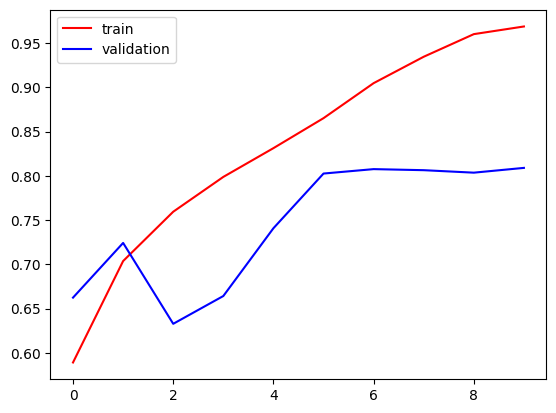

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color = "red", label = "train")
plt.plot(history.history["val_accuracy"], color = "blue", label = "validation")
plt.legend()
plt.show()

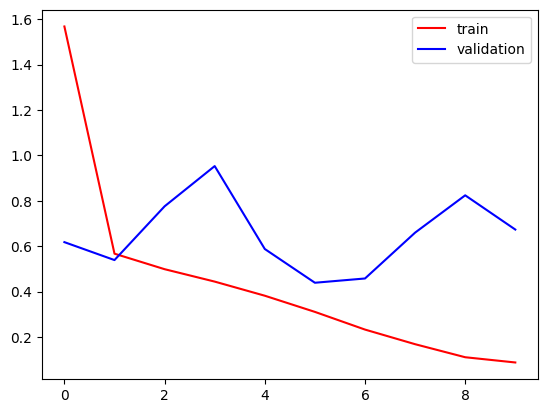

In [25]:
plt.plot(history.history["loss"], color = "red", label = "train")
plt.plot(history.history["val_loss"], color = "blue", label = "validation")
plt.legend()
plt.show()

In [26]:
import cv2

In [33]:
test_img = cv2.imread("/content/cat.jpeg")

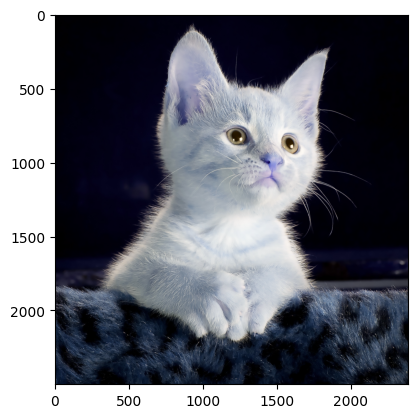

In [34]:
plt.imshow(test_img)

In [35]:
test_img.shape

(2500, 2392, 3)

In [36]:
test_img = cv2.resize(test_img, (256,256))

In [37]:
test_input = test_img.reshape((1,256,256,3))

In [38]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)